In [1]:
# 02_exploratory_data.ipynb

import sys
sys.path.append('../scripts')

from eda import *

df = show_data('../data/heart-disease-cleaned.csv')

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
df.sex.value_counts()

# sex: 1 = male, 0 = female
# This study has more males than females by 2 times

sex
1    206
0     96
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

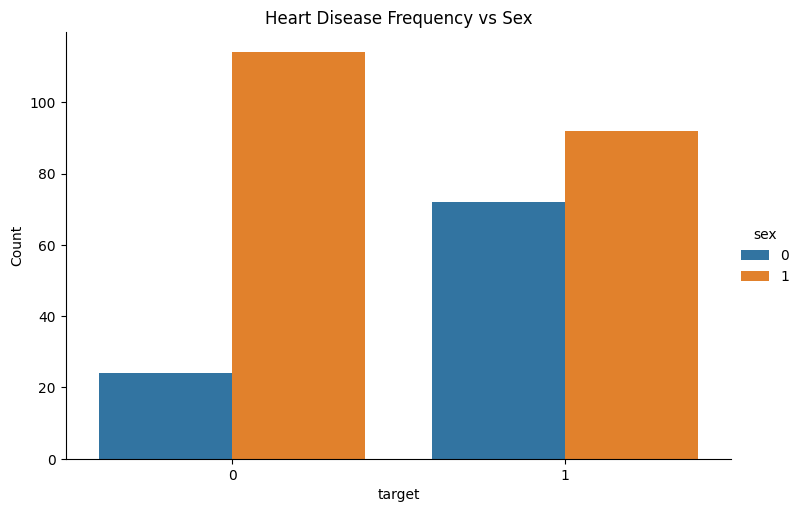

sex,0,1
target,,
0,24,114
1,72,92


In [4]:
bar_chart(df, 'target', 'sex')

# target - have disease or not (1=yes, 0=no)

crosstab(df)

# from this we can that is more likely that the men has around 44,7% probability to have heart disease and the women around 75% probability

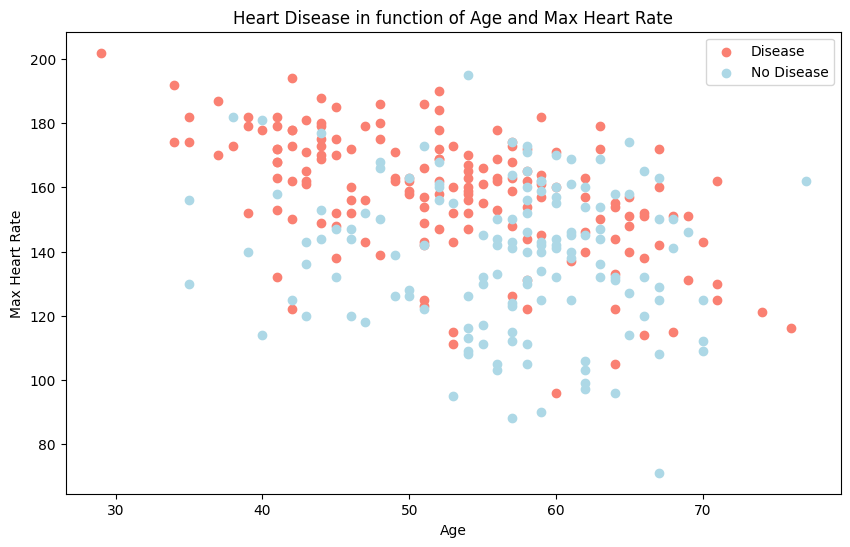

In [5]:
# Comparing age and maximum heart rate

age_vs_max_heart_rate(df)

# the younger the person the higher their maximum heart rate

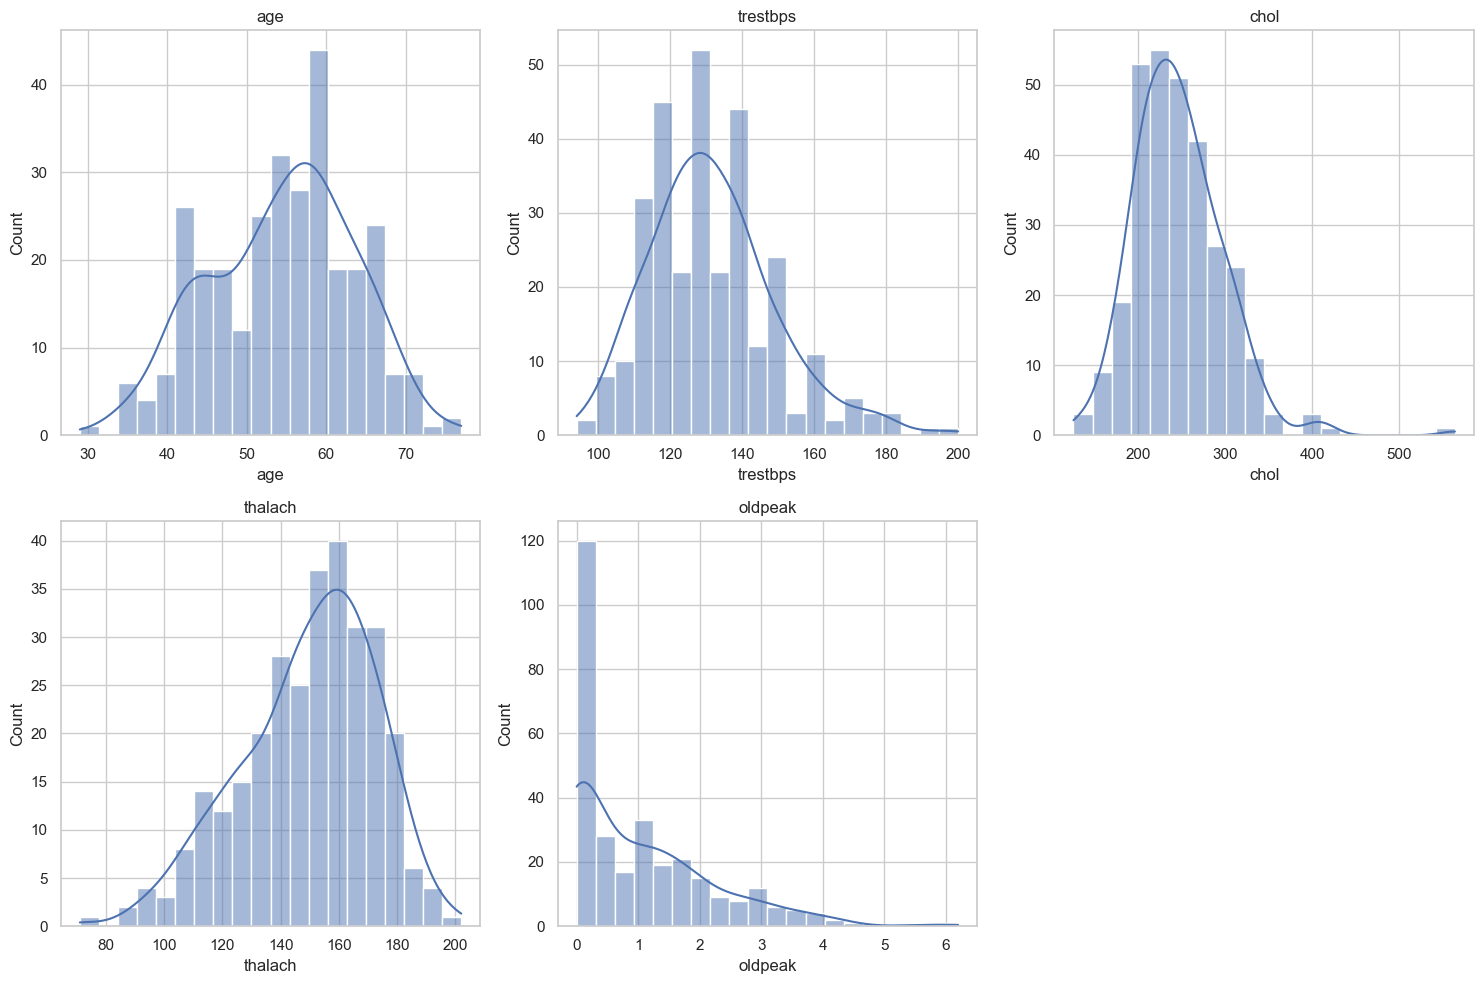

In [6]:
histogram(df, ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

# The histograms of the selected features indicate varying distributions and ranges. For instance, features like cholesterol and blood pressure have a wide range, while age is more concentrated in a specific range.

In [7]:
filtered_df = remove_outliers(df, ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

filtered_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
scaled_df = scaling(filtered_df, ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

scaled_df.to_csv('../data/heart-disease-scaled.csv', index=False)

scaled_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.982275,1,3,0.984117,-0.208961,1,0,0.001716,0,1.315709,0,0,1,1
1,-1.871092,1,2,0.007591,0.172417,0,1,1.635162,0,2.486915,0,0,2,1
2,-1.432112,0,1,0.007591,-0.859547,0,0,0.972954,0,0.437305,2,0,2,1
3,0.214061,1,1,-0.643426,-0.141659,0,1,1.237837,0,-0.148297,2,0,2,1
4,0.323805,0,0,-0.643426,2.505551,0,1,0.575629,1,-0.343498,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.323805,0,0,0.658608,-0.029489,0,1,-1.190258,1,-0.733900,1,0,3,0
298,-0.993133,1,3,-1.294442,0.486493,0,1,-0.792933,0,0.242104,1,0,3,0
299,1.530999,1,0,0.919015,-1.106321,1,1,-0.395609,0,2.389314,1,2,3,0
300,0.323805,1,0,0.007591,-2.497228,0,1,-1.543436,1,0.242104,1,1,3,0


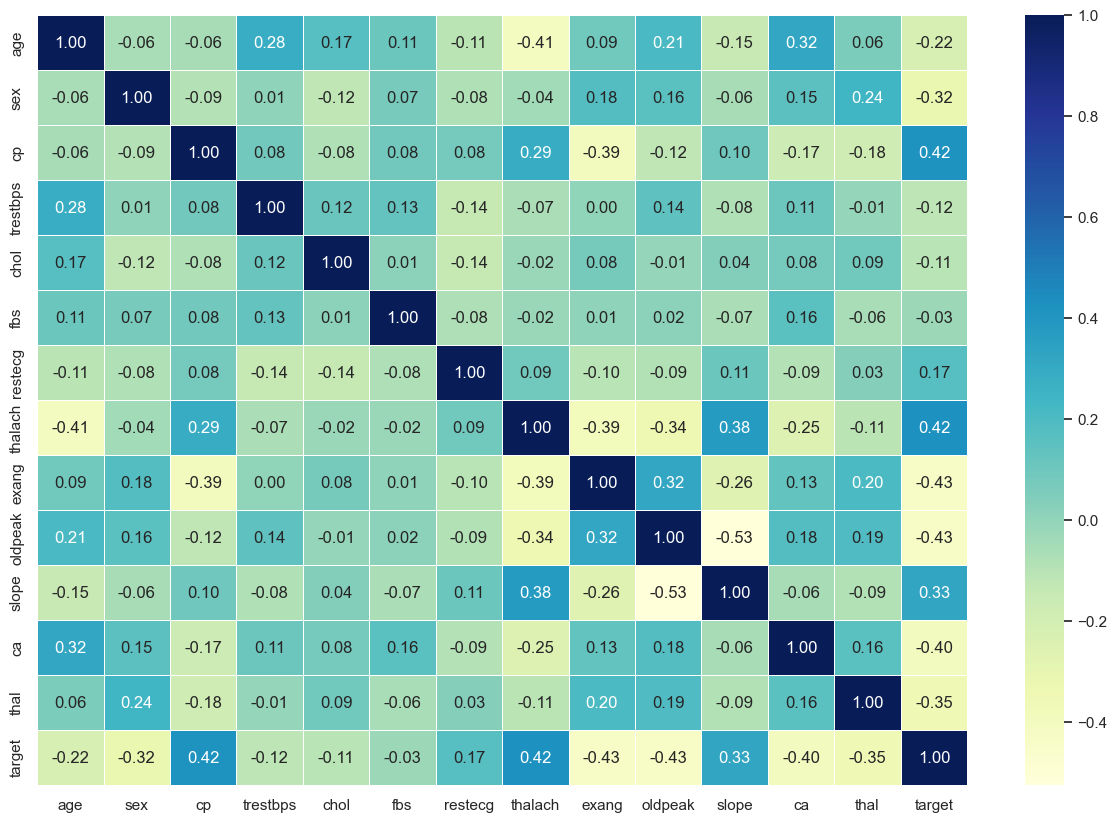

In [9]:
heatmap(scaled_df)